In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = os.getcwd()
print(path)

C:\Users\MWCL702


In [3]:
goog = pd.read_csv('GOOG.csv', header = 0, index_col = False, usecols = ['Date','Adj Close'])
ko = pd.read_csv('KO_withdiv.csv', header = 0, index_col = False, usecols = ['Date','Adj Close'])
sp500 = pd.read_csv('S&P500.csv',header = 0, index_col = False, usecols = ['Date','Adj Close'])

In [4]:
ko.rename(columns={'Adj Close':'p_t'}, inplace = True)
goog.rename(columns={'Adj Close':'p_t'}, inplace = True) #rename adj closing price to p_t
sp500.rename(columns={'Adj Close':'p_t'}, inplace = True)

In [5]:
goog_price = goog.loc[0:59]
goog_price = goog_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
goog_price = emptyrow.append(goog_price)
goog_price = goog_price.drop('Date', axis = 1)
goog_price.index = range(0,61)
goog = pd.concat([goog, goog_price], axis = 1)
goog['return'] = round((goog['p_t'] - goog['p_t-1'])/goog['p_t-1'], 4 )
goog = goog.drop(0, axis = 0)

In [6]:
ko_price = ko.loc[0:59]
ko_price = ko_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
ko_price = emptyrow.append(ko_price)
ko_price = ko_price.drop(['Date'],axis = 1)
ko_price.index = range(0,61)
ko = pd.concat([ko, ko_price], axis = 1)
ko['return'] = round((ko['p_t'] - ko['p_t-1'])/ko['p_t-1'], 4)
ko = ko.drop(0, axis = 0)

In [7]:
sp500_price = sp500.loc[0:59]
sp500_price = sp500_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
sp500_price = emptyrow.append(sp500_price)
sp500_price = sp500_price.drop('Date', axis = 1)
sp500_price.index = range(0,61)
sp500 = pd.concat([sp500, sp500_price], axis = 1)
sp500['return'] = round((sp500['p_t'] - sp500['p_t-1'])/sp500['p_t-1'], 4 )
sp500 = sp500.drop(0, axis = 0)

In [8]:
print(os.getcwd())

C:\Users\MWCL702


In [9]:
goog.to_csv('goog_return.csv',index = True, header = True)

In [10]:
ko.to_csv('ko_return.csv',index = True, header = True)

In [11]:
sp500.to_csv('sp_return.csv',index = True, header = True)

In [12]:
mean_std_goog = goog['return'].agg(['mean','std'])
mean_std_ko = ko['return'].agg(['mean','std'])

In [13]:
print('correlation is ',round(goog['return'].corr(ko['return']), 4),'\ngoogl \n', mean_std_goog,'\nko \n',mean_std_ko ,sep = "")

correlation is 0.3555
googl 
mean    0.012340
std     0.058155
Name: return, dtype: float64
ko 
mean    0.007427
std     0.037702
Name: return, dtype: float64


In [14]:
portfolio_ratio = np.arange(0,1.05,0.05)
ko_mean = ko['return'].mean()
ko_std = ko['return'].std()
goog_mean = goog['return'].mean()
goog_std = goog['return'].std()
sp500_mean = sp500['return'].mean()
sp500_std = sp500['return'].std()
corr_ko_goog = goog['return'].corr(ko['return'])

In [15]:
portfolio = pd.DataFrame(data= {'ko_ratio':portfolio_ratio})
portfolio['goog_ratio'] = 1 - portfolio['ko_ratio']
portfolio['portfolio_mean'] = round(ko_mean * portfolio['ko_ratio'] + goog_mean * portfolio['goog_ratio'], 4)
portfolio['portfolio_var'] = (ko_std  * portfolio['ko_ratio'] )**2 + (goog_std * portfolio['goog_ratio'] )**2 + 2 * portfolio['ko_ratio'] * portfolio['goog_ratio'] * corr_ko_goog * goog_std * ko_std
portfolio['portfolio_std'] = round((portfolio['portfolio_var']) ** 0.5, 4)

In [16]:
portfolio
portfolio.to_csv('portfolio.csv',index = True, header = True)

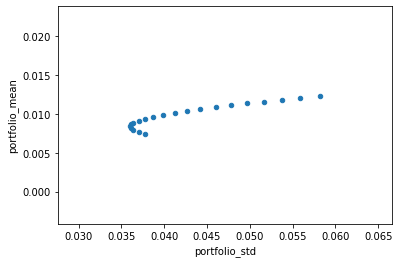

In [17]:
plot_port = portfolio.plot.scatter(x = 'portfolio_std', y = 'portfolio_mean')
plot_port
plt.savefig('portfolio.png')

In [18]:
sp500.loc[60,'return']

0.0787

In [19]:
sp500

,Date,p_t,p_t-1,return
1,2014-02-01,1859.449951,1782.589966,0.0431
2,2014-03-01,1872.339966,1859.449951,0.0069
3,2014-04-01,1883.949951,1872.339966,0.0062
4,2014-05-01,1923.569946,1883.949951,0.0210
5,2014-06-01,1960.229980,1923.569946,0.0191
6,2014-07-01,1930.670044,1960.229980,-0.0151
7,2014-08-01,2003.369995,1930.670044,0.0377
8,2014-09-01,1972.290039,2003.369995,-0.0155
9,2014-10-01,2018.050049,1972.290039,0.0232
10,2014-11-01,2067.560059,2018.050049,0.0245


In [20]:
sp500_ko_goog = pd.DataFrame(data = {'sp_500_r':sp500['return'],'ko_r':ko['return'],'goog_r':goog['return'] })

In [21]:
cov_sp500_ko = sp500_ko_goog['sp_500_r'].cov(sp500_ko_goog['ko_r'])
cov_sp500_goog = sp500_ko_goog['sp_500_r'].cov(sp500_ko_goog['goog_r'])

In [22]:
beta_ko = round(cov_sp500_ko/(sp500_std)**2, 4) #round off to 4th decimal
beta_goog = round(cov_sp500_goog/(sp500_std)**2, 4)
print('beta of ko   is ',beta_ko,'\n','beta of goog is ',beta_goog, sep = '')

beta of ko   is 0.5351
beta of goog is 1.0369


In [23]:
def capm(beta,mkt_r,r):
    return(r + beta * (mkt_r - r))

In [24]:
sp500_mean

0.00749

In [28]:
ko_2018_capm = round(capm(beta_ko, sp500_mean, 0.001),4)
goog_2018_capm = round(capm(beta_goog, sp500_mean, 0.001),4)

In [29]:
print('expected return of ko at Dec.2008 is ',ko_2018_capm,"\nthe true return is ",ko.loc[60,'return'])

expected return of ko at Dec.2008 is  0.0045 
the true return is  0.0165


In [30]:
print('expected return of goog at Dec.2008 is ',goog_2018_capm,"\nthe true return is ",goog.loc[60,'return'])

expected return of goog at Dec.2008 is  0.0077 
the true return is  0.078
